# Boston Housing Pricing- Regression

In [1]:
#imports
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
x_train.shape

(404, 13)

In [4]:
y_train.shape

(404,)

In [5]:
x_test.shape

(102, 13)

In [6]:
y_test.shape

(102,)

In [7]:
y_train
# median housing pricing in thousands of dollars

array([ 15.2,  42.3,  50. ,  21.1,  17.7,  18.5,  11.3,  15.6,  15.6,
        14.4,  12.1,  17.9,  23.1,  19.9,  15.7,   8.8,  50. ,  22.5,
        24.1,  27.5,  10.9,  30.8,  32.9,  24. ,  18.5,  13.3,  22.9,
        34.7,  16.6,  17.5,  22.3,  16.1,  14.9,  23.1,  34.9,  25. ,
        13.9,  13.1,  20.4,  20. ,  15.2,  24.7,  22.2,  16.7,  12.7,
        15.6,  18.4,  21. ,  30.1,  15.1,  18.7,   9.6,  31.5,  24.8,
        19.1,  22. ,  14.5,  11. ,  32. ,  29.4,  20.3,  24.4,  14.6,
        19.5,  14.1,  14.3,  15.6,  10.5,   6.3,  19.3,  19.3,  13.4,
        36.4,  17.8,  13.5,  16.5,   8.3,  14.3,  16. ,  13.4,  28.6,
        43.5,  20.2,  22. ,  23. ,  20.7,  12.5,  48.5,  14.6,  13.4,
        23.7,  50. ,  21.7,  39.8,  38.7,  22.2,  34.9,  22.5,  31.1,
        28.7,  46. ,  41.7,  21. ,  26.6,  15. ,  24.4,  13.3,  21.2,
        11.7,  21.7,  19.4,  50. ,  22.8,  19.7,  24.7,  36.2,  14.2,
        18.9,  18.3,  20.6,  24.6,  18.2,   8.7,  44. ,  10.4,  13.2,
        21.2,  37. ,

# Data Preprocessing

In [8]:
#The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.



In [9]:
## Method 1- Standard Scaler

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc_X = StandardScaler()

In [12]:
x_train = sc_X.fit_transform(x_train)

In [13]:
x_test = sc_X.fit_transform(x_test)

In [14]:
x_train

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ..., 
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [15]:
x_train.shape

(404, 13)

In [16]:
from keras import models, layers

In [17]:
#create base model
def base_model():
    model= models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['MAE'])
    return model


## Create cross hold out validation set using K -fold Cross Validation

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy

## CV Method 1

In [19]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
cvscores = []
for train, test in kfold.split(x_train, y_train):
  # create model
    model = Sequential()
    model= models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['MAE'])


# Fit the model
    model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
# evaluate the model
    scores = model.evaluate(x_test, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


mean_absolute_error: 269.90%
269.90% (+/- 0.00%)
mean_absolute_error: 256.51%
263.21% (+/- 6.69%)
mean_absolute_error: 251.19%
259.20% (+/- 7.87%)
mean_absolute_error: 284.84%
265.61% (+/- 13.03%)
mean_absolute_error: 263.38%
265.17% (+/- 11.69%)
mean_absolute_error: 254.89%
263.45% (+/- 11.33%)
mean_absolute_error: 260.33%
263.01% (+/- 10.55%)
mean_absolute_error: 261.33%
262.80% (+/- 9.88%)
mean_absolute_error: 299.22%
266.84% (+/- 14.76%)
mean_absolute_error: 247.96%
264.96% (+/- 15.11%)


In [20]:
numpy.mean(cvscores)

264.95617847816618

In [21]:
cvscores

[269.90453589196301,
 256.51495035956884,
 251.19181240306182,
 284.83675414440677,
 263.38058826970121,
 254.88658792832317,
 260.33456933264637,
 261.32997344521914,
 299.22044136944936,
 247.96157163732192]

## CV Method 2

In [22]:
k=4
no_of_val_sample= len(x_train)//k
all_scores=[]


In [23]:
3import numpy as np

for i in range(k):
    val_data= x_train[i*no_of_val_sample:(i+1)*no_of_val_sample]
    val_target= y_train[i*no_of_val_sample:(i+1)*no_of_val_sample]
    partial_x_train= np.concatenate([x_train[:i*no_of_val_sample],x_train[(i+1)*no_of_val_sample:]],axis=0)
    partial_y_train= np.concatenate([y_train[:i*no_of_val_sample],y_train[(i+1)*no_of_val_sample:]],axis=0)
    model=base_model()
    model.fit(partial_x_train, partial_y_train, epochs=150, batch_size=1, verbose=0)
    val_mse,val_mae = model.evaluate(val_data, val_target, verbose=0)
    all_scores.append(val_mae)
    

scores

np.mean(scores)
av. score are 6.7K off

## Method 2- k Fold Cross validation

In [40]:
import numpy as np

k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [x_train[:i * num_val_samples],
         x_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = base_model()
    # Train the model (in silent mode, verbose=0)
    history=model.fit(partial_train_data, partial_train_targets,validation_data=(val_data,val_targets),
              epochs=num_epochs, batch_size=1, verbose=0)
    mae_history= history.history['val_mean_absolute_error']
    # Evaluate the model on the validation data
    #val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [41]:
all_scores

[[3.959186629493638,
  3.3860895326822109,
  3.1058683017692945,
  2.7067759863220817,
  2.590225059207123,
  2.4574509988916984,
  2.3679593718878111,
  2.1887245225434255,
  2.1211296213735449,
  2.1673299298428073,
  2.1239849033922251,
  2.1253555411159404,
  2.3093184008456693,
  1.9571776437287283,
  2.2223888529409277,
  2.0089330578794575,
  2.0380139209256312,
  2.2335999554926804,
  2.0176251430322627,
  2.0132907924085561,
  2.0838207207103765,
  1.8725645612962176,
  2.0483651774944645,
  1.8930102716578114,
  1.8394144265958579,
  1.9298315614756971,
  2.2952087893344388,
  2.1353651651061409,
  1.8023029270738657,
  1.9656358284525353,
  2.013659184521968,
  1.8277322561434,
  2.5605915371734316,
  1.9121542543467909,
  2.0010936661521987,
  1.9408891791164284,
  1.8253989880627925,
  2.4064844528047167,
  2.7573296575262995,
  1.9101496309337049,
  2.0729767544434803,
  2.396961032754124,
  2.160227057957413,
  1.7980018653491936,
  2.136800784875851,
  2.080762532677980

In [52]:
avg_all_scores=[np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]
avg_all_scores

[4.2044642868608531,
 3.3413376690137504,
 3.0802180554607128,
 2.7537483106745353,
 2.9850800344259429,
 2.6262477789774978,
 2.5146540674832787,
 2.6106776235127214,
 2.507787041144796,
 2.4787756694425456,
 2.585597023515418,
 2.5258169286321888,
 2.5152736447825292,
 2.4779716352425001,
 2.5363712794709912,
 2.4110965469095964,
 2.4512662663318143,
 2.4736000405679834,
 2.3829104463652806,
 2.3961918649106924,
 2.4924046414913517,
 2.3266107422290458,
 2.4180197125614278,
 2.4214332044714748,
 2.2994860540522204,
 2.3258951760754729,
 2.4268021984855728,
 2.5189601171134726,
 2.3023252392759419,
 2.3576867875486318,
 2.3892791896763415,
 2.2742678056849113,
 2.4657421631388146,
 2.3097065156049066,
 2.4301378939411427,
 2.332085394623256,
 2.3295890777417929,
 2.5146936449674095,
 2.5771559960771313,
 2.3028995849118372,
 2.4211161443502598,
 2.3703993676912667,
 2.3749309152659803,
 2.3344050197318049,
 2.4770292987917912,
 2.4071857126632539,
 2.3721224246638837,
 2.3808560678274

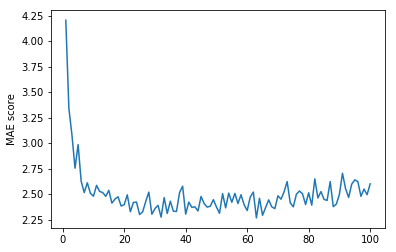

In [55]:
plt.plot(range(1,len(avg_all_scores)+1),avg_all_scores)
plt.ylabel("MAE score")
plt.show()

In [ ]:
#look for best parameters- no pf epochs in this case- 

In [56]:
# Train final model with best features

In [26]:
all_scores

[2.0934012172245744,
 2.4567395814574593,
 2.7914296660092797,
 2.5629287946342241]

In [31]:
np.mean(all_scores)
#avera 2.4K difference

2.4761248148313841

In [33]:
import matplotlib.pyplot as plt

In [37]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_47 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


AttributeError: 'Sequential' object has no attribute 'history'